# key words
- decomposition: PCA, KernelPCA

Correlation coefficient of X.T:
 [[ 1.         -0.11756978  0.87175378  0.81794113]
 [-0.11756978  1.         -0.4284401  -0.36612593]
 [ 0.87175378 -0.4284401   1.          0.96286543]
 [ 0.81794113 -0.36612593  0.96286543  1.        ]]
Covariance of X.T before FA:
 [[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]
1.0 [0.92461872 0.05306648 0.01710261 0.00521218]
0.9776852063187949 [0.92461872 0.05306648]
0.9947878161267246 [0.92461872 0.05306648 0.01710261]


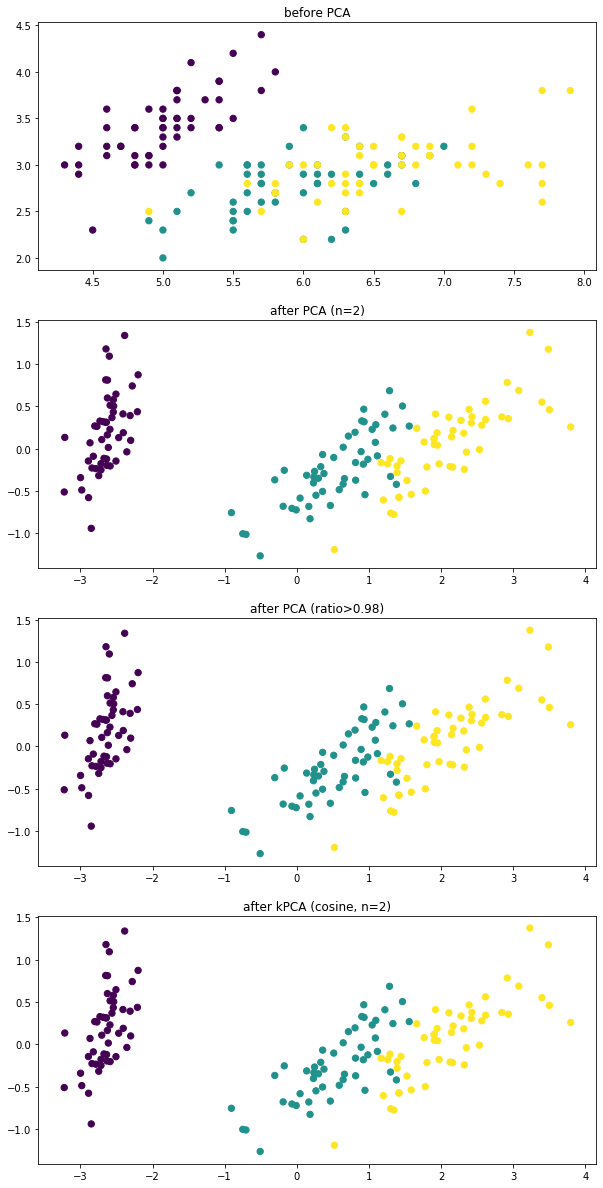

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import datasets

from sklearn import decomposition

iris = datasets.load_iris()
X = iris.data
y = iris.target

# to see if corrcoef >= 0.3
print("Correlation coefficient of X.T:\n", np.corrcoef(X.T))
print("Covariance of X.T before FA:\n", np.cov(X.T))

pca = decomposition.PCA()
X_pca = pca.fit_transform(X)
print(pca.explained_variance_ratio_.sum(), pca.explained_variance_ratio_)

pca_n2 = decomposition.PCA(n_components=2)
X_pca_n2 = pca_n2.fit_transform(X)
print(pca_n2.explained_variance_ratio_.sum(), pca_n2.explained_variance_ratio_)

pca_098 = decomposition.PCA(n_components=.98)
X_pca_098 = pca_098.fit_transform(X)
print(pca_098.explained_variance_ratio_.sum(), pca_098.explained_variance_ratio_)

kpca = decomposition.KernelPCA(kernel='cosine', n_components=2)
X_kpca_n2 = kpca.fit_transform(X)
# print(X_kpca_n2.explained_variance_ratio_.sum(), X_kpca_n2.explained_variance_ratio_)

plt.figure(figsize=(10, 21))

plt.subplot(4, 1, 1, title="before PCA")
plt.scatter(X[:, 0], X[:, 1], c=y, s=40)

plt.subplot(4, 1, 2, title="after PCA (n=2)")
plt.scatter(X_pca_n2[:, 0], X_pca_n2[:, 1], c=y, s=40)

plt.subplot(4, 1, 3, title="after PCA (ratio>0.98)")
plt.scatter(X_pca_098[:, 0], X_pca_098[:, 1], c=y, s=40)

plt.subplot(4, 1, 4, title="after kPCA (cosine, n=2)")
plt.scatter(X_pca_n2[:, 0], X_pca_n2[:, 1], c=y, s=40)

plt.show()